<a href="https://colab.research.google.com/github/gamodilac/roboticHW/blob/main/W4_ST2_FUZZYLOGIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=e89e3af738d0b0be3019701d98544b84289d175ffbd86a71d986eb3dae88cde2
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [6]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

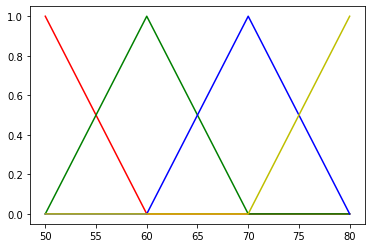

In [9]:
x  = np.arange(50,81,1)
slow = fuzz.trimf(x,[50,50,60])
medium = fuzz.trimf(x, [50,60,70])
medi_fast = fuzz.trimf(x,[60,70,80])
full_speed = fuzz.trimf(x,[70,80,80])
plt.figure()
plt.plot(x,slow,"r",linewidth = 1.5, label = 'slow')
plt.plot(x,medium,"g",linewidth = 1.5, label = 'medium')
plt.plot(x,medi_fast,"b",linewidth = 1.5, label = 'medi_fast')
plt.plot(x,full_speed,"y",linewidth = 1.5, label = 'full_speed')

In [41]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])

service['poor'] = fuzz.trimf(service.universe,[0,0,7])
service['average'] = fuzz.trimf(service.universe,[0,4,10])
service['good'] = fuzz.trimf(service.universe,[7,10,10])

tip['less'] = fuzz.trimf(tip.universe,[10,10,22])
tip['average'] = fuzz.trimf(tip.universe,[10,20,30])
tip['Much'] = fuzz.trimf(tip.universe,[22,30,30])

In [ ]:
food.view()
service.view()
tip.view()
service['average'].view()

In [43]:
rule_1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule_2 = ctrl.Rule(food['poor']&service['average'],tip['less'])
rule_3 = ctrl.Rule(food['poor']&service['good'],tip['less'])
rule_4 = ctrl.Rule(food['average']&service['poor'],tip['less'])
rule_5 = ctrl.Rule(food['average']&service['average'],tip['average'])
rule_6 = ctrl.Rule(food['average']&service['good'],tip['Much'])
rule_7 = ctrl.Rule(food['good']&service['poor'],tip['less'])
rule_8 = ctrl.Rule(food['good']&service['average'],tip['average'])
rule_9 = ctrl.Rule(food['good']&service['good'],tip['Much'])

27.333333333333332


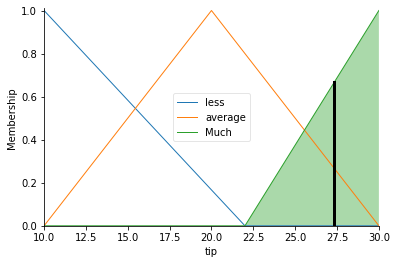

In [45]:
tipping_ctrl = ctrl.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 10
tipping.input['service'] = 10
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)